In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import PolynomialFeatures
import re

In [2]:
file_name = './amazon_reviews_us_Gift_Card_v1_00.tsv'
df = pd.read_csv(file_name, sep='\t')

In [3]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0,N,Y,Five Stars,Great birthday gift for a young adult.,2015-08-31
1,US,42489718,RJ7RSBCHUDNNE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Gift card for the greatest selection of items ...,It's an Amazon gift card and with over 9823983...,2015-08-31
2,US,861463,R1HVYBSKLQJI5S,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,5,0,0,N,Y,Five Stars,Good,2015-08-31
3,US,25283295,R2HAXF0IIYQBIR,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,1,0,0,N,Y,One Star,Fair,2015-08-31
4,US,397970,RNYLPX611NB7Q,B005ESMGV4,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Desi...",Gift Card,5,0,0,N,Y,Five Stars,I can't believe how quickly Amazon can get the...,2015-08-31


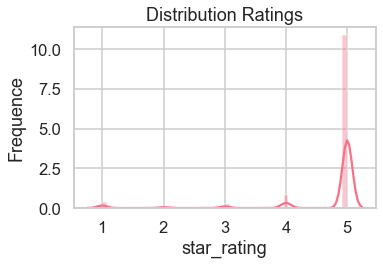

In [4]:
plt.gcf().subplots_adjust(bottom=0.25, left = 0.2)
sns.set_palette("husl")
sns.set_style("whitegrid")
sns.set_context('talk')
plt.title('Distribution Ratings')
plt.ylabel('Frequence')
sns.distplot(df['star_rating'])
plt.savefig('dist.jpg')

In [5]:
df = df.dropna() #drop nan values

In [6]:
df['length_review'] = df['review_body'].apply(
    lambda x: len([i for i in re.split('\.|\s|,',x) if i != ''])) #calculate length of review_body

In [7]:
df['verified_purchase'] = df['verified_purchase'].astype('category')

In [8]:
X = df[['verified_purchase', 'length_review']]

In [9]:
X['verified_purchase'] = X['verified_purchase'].apply(lambda x:
                                                      1 if x == 'Y' else 0)

<ipython-input-9-bfd46326b2a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['verified_purchase'] = X['verified_purchase'].apply(lambda x:


In [10]:
y = df['star_rating']

In [11]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [12]:
results = model.intercept_, model.coef_

In [13]:
results

(4.854694632891142, array([ 0.04467618, -0.00674489]))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,y, test_size = 0.1,
                                        shuffle = False)

In [15]:
model_separate = LinearRegression()

In [16]:
model_separate.fit(X_train, y_train)
y_pred_train = model.predict(X_train)

In [17]:
y_pred_test = model_separate.predict(X_test)

In [18]:
MSE(y_pred_train, y_train)

0.6219921476705995

In [19]:
MSE(y_pred_test, y_test)

0.956418127374568

In [20]:
X_polynomial = df[['verified_purchase', 'length_review', 'helpful_votes', 'total_votes']]
y_polynomial = df['star_rating']

In [21]:
X_polynomial['verified_purchase'] = X_polynomial['verified_purchase'].apply(lambda x: 1 if x == 'Y' else 0)

<ipython-input-21-29bfb4219868>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_polynomial['verified_purchase'] = X_polynomial['verified_purchase'].apply(lambda x: 1 if x == 'Y' else 0)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_polynomial,y_polynomial, test_size = 0.1, shuffle = False)

Calculating polynomial with degree = 1
Test error: 0.95
Train error: 0.61
Calculating polynomial with degree = 2
Test error: 1.1
Train error: 0.59
Calculating polynomial with degree = 3
Test error: 1.2e+01
Train error: 0.58


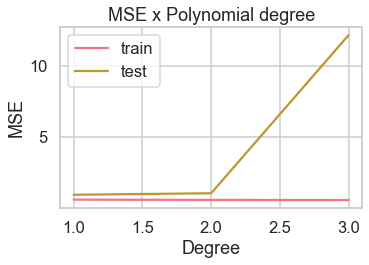

In [27]:
plt.gcf().subplots_adjust(bottom=0.25, left = 0.2)
list_errors_train = []
list_errors_test = []
for i in range (1,4):
    print('Calculating polynomial with degree = {}'.format(i))
    poly = PolynomialFeatures(i)
    model = LinearRegression()
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    model.fit(X_train_poly, y_train)
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)
    test_error = MSE(y_pred_test,y_test)
    train_error = MSE(y_pred_train, y_train)
    print('Test error: {:.2}'.format(test_error))
    print('Train error: {:.2}'.format(train_error))
    list_errors_train.append(train_error)
    list_errors_test.append(test_error)
    
plt.plot(range(1,4), list_errors_train, label = 'train')
plt.plot(range(1,4), list_errors_test, label = 'test')
plt.title('MSE x Polynomial degree')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend()
plt.savefig('MSE.png')

In [32]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

In [29]:
poly = PolynomialFeatures(2)

In [31]:
poly.fit_transform(X_train)

array([[ 1.,  1.,  7., ...,  0.,  0.,  0.],
       [ 1.,  1., 19., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  0., 32., ...,  0.,  0.,  0.],
       [ 1.,  0., 40., ...,  0.,  0.,  0.],
       [ 1.,  1., 25., ...,  0.,  0.,  0.]])